True Mean: 5, Estimated Mean: 5.0137


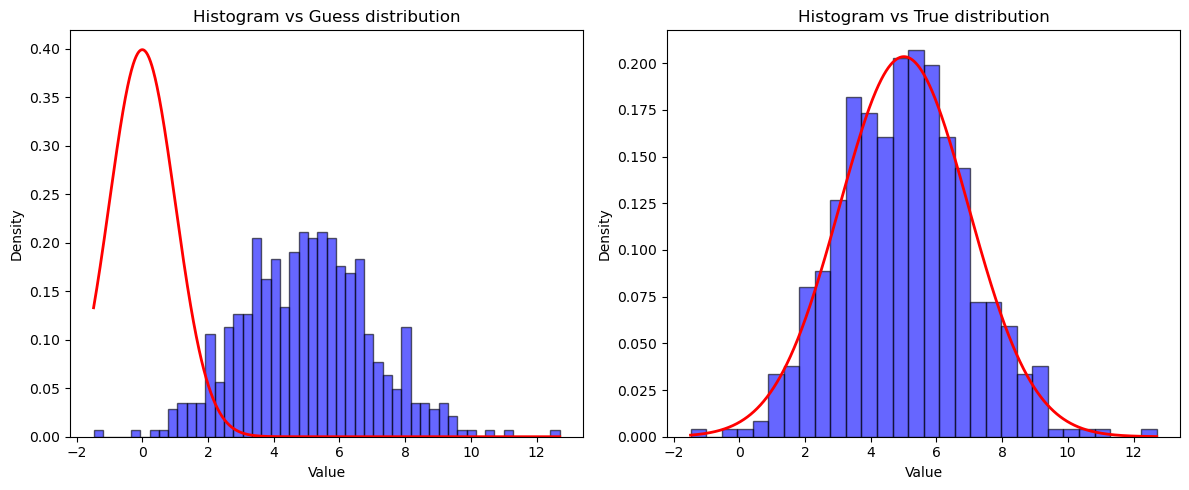

True Std Dev: 2, Estimated Std Dev: 1.9605


In [20]:
import numpy as np
from scipy.optimize import minimize

def generate_samples(mean=0, std=1, size=1000, distribution='normal'):
    """Generate random samples from a given distribution."""
    if distribution == 'normal':
        return np.random.normal(mean, std, size)
    elif distribution == 'exponential':
        return np.random.exponential(scale=1/mean, size=size)
    else:
        raise ValueError("Unsupported distribution. Choose 'normal' or 'exponential'.")

def normal_log_likelihood(params, data):
    """Log-likelihood function for normal distribution."""
    mean, std = params
    if std <= 0:  # Ensure standard deviation is positive
        return np.inf
    n = len(data)
    log_likelihood = -n * np.log(std) - np.sum((data - mean)**2) / (2 * std**2)
    return -log_likelihood  # Negative for minimization

def estimate_mle(data):
    """Estimate parameters using Maximum Likelihood Estimation (MLE)."""
    initial_guess = [0.0, 1.1]
    result = minimize(normal_log_likelihood, initial_guess, args=(data,), method='L-BFGS-B', bounds=[(None, None), (1e-6, None)])
    return result.x  # Returns estimated (mean, std)

# Example usage
np.random.seed(42)  # For reproducibility
true_mean,true_std=(5,2);
samples = generate_samples(mean=true_mean, std=true_std, size=500)
estimated_mean, estimated_std = estimate_mle(samples)

print(f"True Mean: 5, Estimated Mean: {estimated_mean:.4f}")

plot_histogram_and_pdf(samples, (0,1), (estimated_mean, estimated_std))

print(f"True Std Dev: 2, Estimated Std Dev: {estimated_std:.4f}")


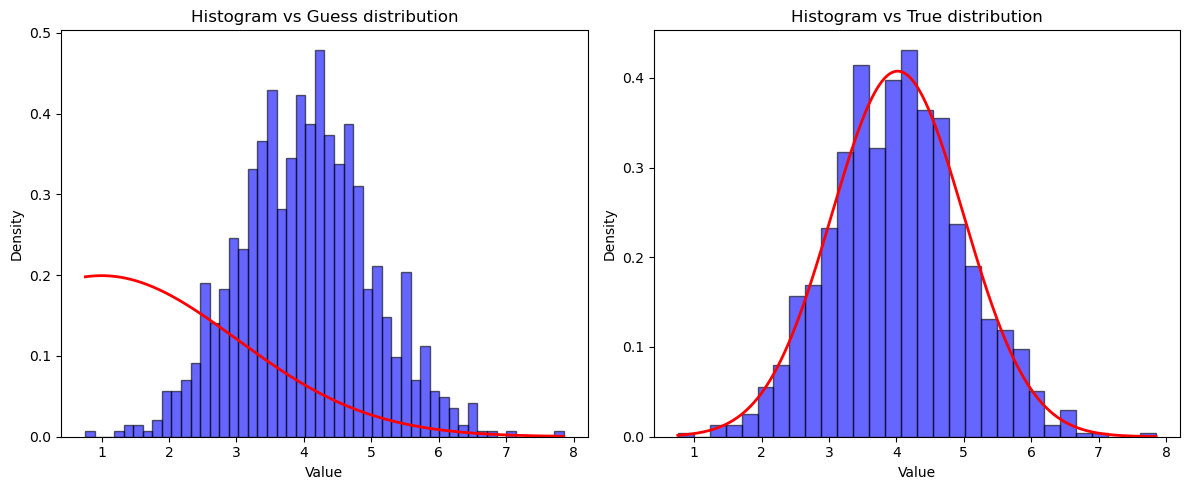

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_histogram_and_pdf(samples, guess_params, est_params):
    """
    Plots a histogram of samples on the left and the probability density function (PDF) on the right.

    Parameters:
        samples (numpy array): The sampled data points.
        estimated_params (tuple): Estimated (mean, std deviation) for the normal distribution.
    """
    guess_mean, guess_std = guess_params
    est_mean, est_std = est_params
    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Left plot: Histogram of samples
    axes[0].hist(samples, bins=50, density=True, alpha=0.6, color='blue', edgecolor='black')
    axes[0].set_title("Histogram vs Guess distribution")
    axes[0].set_xlabel("Value")
    axes[0].set_ylabel("Density")
    x_values = np.linspace(min(samples), max(samples), 1000)
    pdf_values = norm.pdf(x_values, guess_mean, guess_std)
    axes[0].plot(x_values, pdf_values, color='red', linewidth=2, label=f'N({guess_mean:.2f}, {guess_std:.2f})')

    # Right plot: PDF using estimated parameters

    axes[1].hist(samples, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black')
    axes[1].set_title("Histogram vs MLE Estimate distribution")
    axes[1].set_xlabel("Value")
    axes[1].set_ylabel("Density")
    x_values = np.linspace(min(samples), max(samples), 1000)
    pdf_values = norm.pdf(x_values, est_mean, est_std)
    axes[1].plot(x_values, pdf_values, color='red', linewidth=2, label=f'N({est_mean:.2f}, {est_std:.2f})')
    plt.tight_layout()
    plt.show()

# Example usage
np.random.seed(42)  # For reproducibility
samples = np.random.normal(loc=4, scale=1, size=1000)
estimated_mean, estimated_std = np.mean(samples), np.std(samples, ddof=1)
guess_mean, guess_std = 1,2;
plot_histogram_and_pdf(samples, (guess_mean, guess_std), (estimated_mean, estimated_std))
